In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

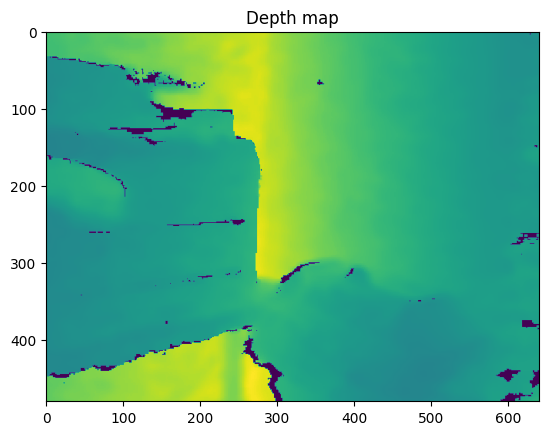

In [2]:
im1 = Image.open('../data/void_1500/data/copyroom1/ground_truth/1552024017.5448.png')
plt.imshow(im1) 
plt.title("Depth map") 
plt.show() 

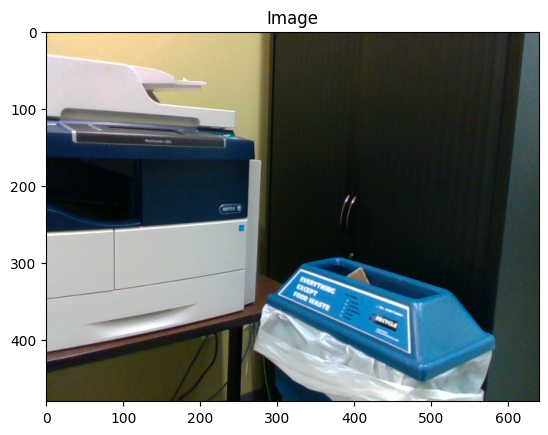

In [4]:
im2 = Image.open('../data/void_1500/data/copyroom1/image/1552024017.5448.png')
plt.imshow(im2) 
plt.title("Image") 
plt.show() 

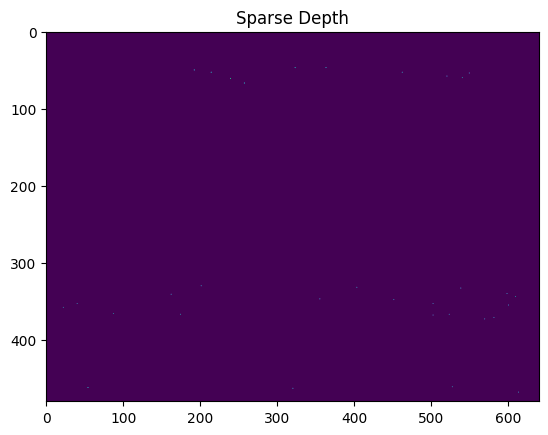

In [21]:
im3 = Image.open('../data/void_1500/data/copyroom1/sparse_depth/1552024017.5448.png')
plt.imshow(im3) 
plt.title("Sparse Depth") 
plt.show() 


In [1]:
from ultralytics import YOLO


/media/home/ryjin/depthclip/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
model = YOLO("../yolov8m-world.pt")

In [16]:
result = model.predict(
    source="../data/void_1500/data/classroom0/image/1552098065.0606.png"
)


image 1/1 /media/home/ryjin/depthclip/RangeCLIP/setup/../data/void_1500/data/classroom0/image/1552098065.0606.png: 480x640 4 chairs, 6.8ms
Speed: 2.5ms preprocess, 6.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


In [17]:
img = result[0].plot()  # This plots the detections on the image

In [18]:
import matplotlib.pyplot as plt

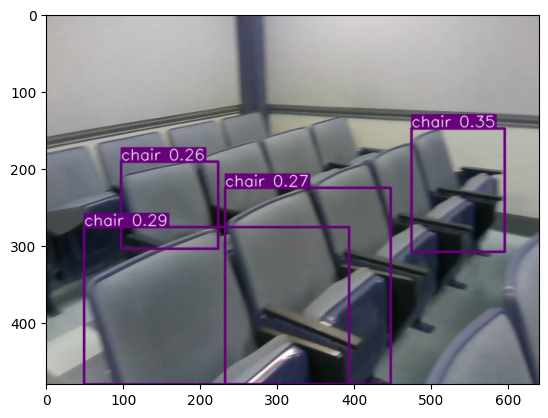

In [19]:
plt.imshow(img)
plt.show()

In [1]:
import os
import numpy as np
from PIL import Image
import json

def read_file(filepath):
    """
    Returns string content from file

    Args:
      path : str
        path to file where data will be stored
    """
    data = ""
    with open(filepath, "r") as f:
        data = f.read()

    return data

def parse_json(json_string, ignore_keys=[]):
    data = json.loads(json_string)
    for ignore_key in ignore_keys:
        data.pop(ignore_key, None)
  
    return data


def read_paths(filepath, prefix=None):
    """
    Reads a list of paths from a file

    Args:
      path : str
        path to file where data will be stored
    """
    path_list = []
    with open(filepath) as f:
        while True:
            path = f.readline().rstrip("\n")
            # If there was nothing to read
            if path == "":
                break

            if prefix:
                path = prefix + path

            path_list.append(path)

    return path_list


def load_depth_with_validity_map(path):
    """
    Loads a depth map and validity map from a 16-bit PNG file

    Args:
      path : str
        path to 16-bit PNG file

    Returns:
      numpy : depth map
      numpy : binary validity map for available depth measurement locations
    """
    # Loads depth map from 16-bit PNG file
    z = np.array(Image.open(path), dtype=np.float32)
    # Assert 16-bit (not 8-bit) depth map
    z = z / 256.0
    z[z <= 0] = 0.0
    v = z.astype(np.float32)
    v[z > 0] = 1.0
    return z, v


def load_depth(path):
    """
    Loads a depth map from a 16-bit PNG file

    Args:
      path : str
        path to 16-bit PNG file

    Returns:
      numpy : depth map
    """
    # Loads depth map from 16-bit PNG file
    z = np.array(Image.open(path), dtype=np.float32)
    # Assert 16-bit (not 8-bit) depth map
    z = z / 256.0
    z[z <= 0] = 0.0
    return z


def save_depth(z, path):
    """
    Saves a depth map to a 16-bit PNG file

    Args:
      z : numpy
        depth map
      path : str
        path to store depth map
    """
    z = np.uint32(z * 256.0)
    z = Image.fromarray(z, mode="I")
    z.save(path)


def load_validity_map(path):
    """
    Loads a validity map from a 16-bit PNG file

    Args:
      path : str
        path to 16-bit PNG file

    Returns:
      numpy : binary validity map for available depth measurement locations
    """
    # Loads depth map from 16-bit PNG file
    v = np.array(Image.open(path), dtype=np.float32)
    assert np.all(np.unique(v) == [0, 256])
    v[v > 0] = 1
    return v


def save_validity_map(v, path):
    """
    Saves a validity map to a 16-bit PNG file

    Args:
      v : numpy
        validity map
      path : str
        path to store validity map
    """
    v[v <= 0] = 0.0
    v[v > 0] = 1.0
    v = np.uint32(v * 256.0)
    v = Image.fromarray(v, mode="I")
    v.save(path)


def write_paths(filepath, paths):
    """
    Stores line delimited paths into file

    Arg(s):
        filepath : str
            path to file to save paths
        paths : list[str]
            paths to write into file
    """

    with open(filepath, "w") as o:
        for idx in range(len(paths)):
            o.write(paths[idx] + "\n")

def get_categories_from_vild_json_file(filepath):
    json_data = read_file(filepath)
    categories_dict = parse_json(json_data, ignore_keys=['annotations', 'info', 'licenses', 'images'])
    categories = [category['name'] for category in categories_dict['categories']]
    return categories

In [2]:
train_image_path = '../training/void_1500/void_1500_train_image.txt'
train_depth_path = '../training/void_1500/void_1500_train_ground_truth.txt'

images = read_paths(train_image_path, prefix='../')
depths = read_paths(train_depth_path, prefix='../')

def get_image_name(path):
    return path.split('/')[-1]

import random

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image




from ultralytics import YOLO
model = YOLO("../yolov8m-world.pt")
yolo_categories = model.names
yolo_categories

/media/home/ryjin/depthclip/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [6]:
categories=get_categories_from_vild_json_file('../data/lvis/lvis_val_100.json')
len(categories)

1230

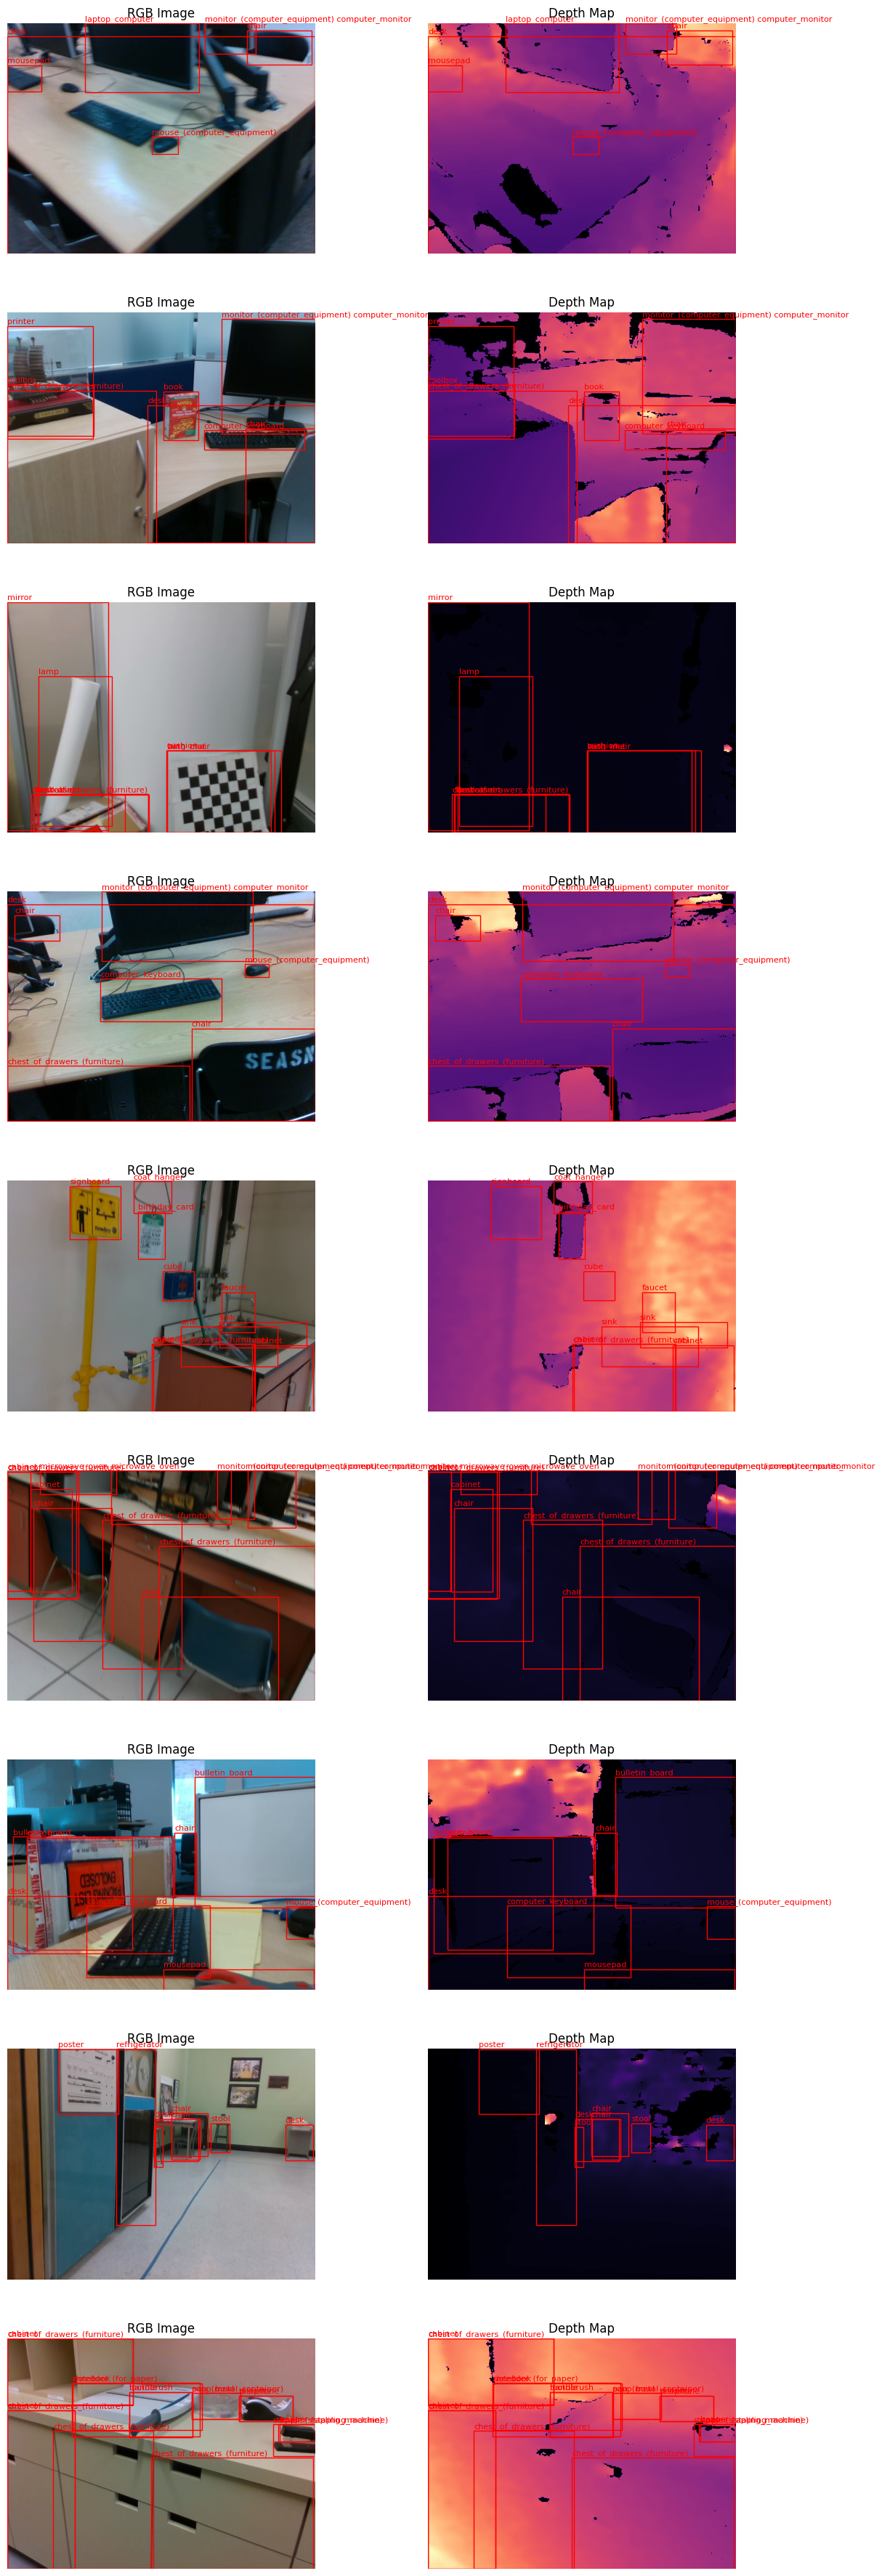

In [8]:


# Configuration
use_yolo_world = True  # Toggle between YOLO-World and YOLOv8

# Function to get category names based on model type
def get_category_name(class_id):
    if use_yolo_world:
        return categories[class_id]  # YOLO-World categories
    else:
        return yolo_categories[class_id]  # YOLOv8 categories

# Function to draw bounding boxes on an image
def draw_bboxes(ax, img, detections, title=""):
    img_array = np.array(img)
    img_width, img_height = img.size
    if 'depth' in title.lower():
        img_array = (img_array - img_array.min()) / (img_array.max() - img_array.min())  # Normalize
        
    ax.imshow(img_array, cmap="magma" if "depth" in title.lower() else None)
    ax.set_title(title, fontsize=12)
    ax.axis("off")

    for det in detections:
        det = [float(s) for s in det]
        class_id, x, y, w, h = det  # Unpack detection values
        class_id = int(class_id)

        # Convert normalized values to pixel coordinates
        x_min = (x - w / 2) * img_width
        y_min = (y - h / 2) * img_height
        box_width = w * img_width
        box_height = h * img_height

        # Create a rectangle patch
        rect = patches.Rectangle((x_min, y_min), box_width, box_height, 
                                 linewidth=1, edgecolor='red', facecolor='none')

        ax.add_patch(rect)
        ax.text(x_min, y_min - 5, f'{get_category_name(class_id)}', color='red', 
                fontsize=8)


    

fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(12, 36)) 
plt.subplots_adjust(wspace=0, hspace=0)
label_set = 'yolo_world_detection_labels' if use_yolo_world else 'yolo_detection_labels'
base_path = '/media/home/ryjin/depthclip/RangeCLIP/training/void_1500/' + label_set + '/labels/'

sampled_images = []
while len(sampled_images) < 9:
    i = random.randint(0, len(images) - 1)
    
    image_path = images[i]  # Path to image file
    image_name=get_image_name(image_path)
    label_path = base_path + image_name.replace('png', 'txt')
    
    if os.path.exists(label_path):
        sampled_images.append(i)

for idx, i in enumerate(sampled_images):
    image_path = images[i]  # Path to image file
    depth_path = depths[i]  # Path to depth file
    image_name = get_image_name(image_path)
    label_path = base_path + image_name.replace('png', 'txt')
    
    if not os.path.exists(label_path):
        continue

    detection_data = read_file(label_path).splitlines()
    detection_data = [d.split(' ') for d in detection_data]

    # Load images
    rgb_img = Image.open(image_path)
    depth_img = Image.open(depth_path)
    

    # Plot RGB image with detections
    draw_bboxes(axes[idx, 0], rgb_img, detection_data, title="RGB Image")
    draw_bboxes(axes[idx, 1], depth_img, detection_data, title="Depth Map")

plt.tight_layout()
plt.show()

